# Programmatic Assignment 1: Blood Glucose Prediction - Umar Ali

### Data Cleaning

We start by combining the data to one single file to be able to clean it. The cleaning process is done in excel. As we can see below, the data contains some invalid data (see most right column)
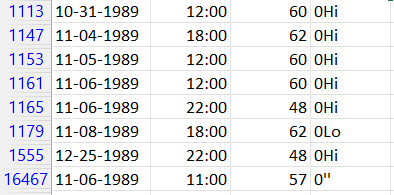

We go column by column and use the filter function in excel to delete rows with invalid data.

For the time column, every row where the time does not conform to the xx:xx format are deleted.

For the code (activity) column, we delete all rows where the code does not match the dataset description (0, 4, ...)

For the value column, all rows not containing a number are deleted.

We lastly delete all rows that contain missing data in a column.

In the end, we have a file which contains no empty coloumns, invalid times, codes or values. 

In [35]:
import numpy as np
import pandas as pd 
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm

We load in the data and make an copy of it.

In [2]:
diabetes_ori = pd.read_csv("filteredData/data_filtered.txt", sep='\t')

In [3]:
diabetes = diabetes_ori.copy()

In [4]:
diabetes.head()

,date,time,code,value
0,04-21-1991,9.09,58,100
1,04-21-1991,9.09,33,9
2,04-21-1991,9.09,34,13
3,04-21-1991,17.08,62,119
4,04-21-1991,17.08,33,7


Here we can see that the total number of rows are 29069. Before the data cleaning, the total number of rows where 29330. We therefore have deleted 261 rows, about 0.89 %.

In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29069 entries, 0 to 29068
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    29069 non-null  object 
 1   time    29069 non-null  float64
 2   code    29069 non-null  int64  
 3   value   29069 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 908.5+ KB


To double check, we check if we have any rows with missing values.

In [6]:
def missing_cols(df):
    '''prints out columns with its amount of missing values'''
    total = 0
    for col in df.columns:
        missing_vals = df[col].isnull().sum()
        total += missing_vals
        if missing_vals != 0:
            print(f"{col} => {df[col].isnull().sum()}")
    
    if total == 0:
        print("no missing values left")
            
missing_cols(diabetes)

no missing values left


### Splitting the data

I have decided to not include the date in traing of the model. The main reason is because the assignment specified that the model takes the time and activity as the input.

Another reason is because I don't believe that the glucose levels from 1990 and 2022 differ that much. Also, the dates in the data are about in a period of 3 years and I don't believe that the levels in that short period vary much.

In [7]:
train = diabetes.drop(['date', 'value'], axis=1)
test = diabetes['value']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(train, test, test_size = 0.3)

### Training the model and testing with test data

Classification is used when you need to split the dataset into classes. For example "spam or not spam". Regression is used to find the correlations between dependent and independent variables. It used to predict, in our case predicit glucose levels.

We will therefore use regression algorithms.

#### Linear Regression

In [9]:
lir = LinearRegression()

In [23]:
lir.fit(x_train, y_train)
lir.score(x_test, y_test)

0.4185471891368613

#### Random Forest Regression

In [24]:
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
rfr.score(x_test, y_test)

0.6377768796999517

#### K-nearest Neighbors Regression (KKN)

In [25]:
knn = KNeighborsRegressor(n_neighbors=6)
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.6404824467883861

#### Decision Tree Regression

In [26]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
dtr.score(x_test, y_test)

0.6131425281668592

#### Support Vector Regression (SVR)

In [36]:
svm = svm.SVR()
svm.fit(x_train, y_train)
svm.score(x_test, y_test)

0.6033985026851185

### Conclusion

The different algorithms have shown that all except SVR give about the same score. The lowest score was given by linear regression. The best perfomer was KNN Regression with Random Forest Regression as a close second.

Linear Regression: 41.85 %

Random Forest Regression: 63.77 %

KNN Regression: 64.04 %

Decision Tree Regression: 61.31 %

SVR: 60.33 %

The data cleaning process can be better. There are some glucose levels which are 0. That is not possible and must be some type of error. Also, after doing som research, levels below 15 are very very extreme and not really possible either.

####  Ethical Implications 

With the data being numbers, you can easily forget that each reading is from a real person, with real life problems and real life implications if the models are deployed. If you can develope an accurate model, I still don't think it should be used in this case. Imagine an insurance company or bank using the model. They can increase the rate or interest rate if you are deemed "risky" just because of your glucose levels. It is an breach of privacy and ethically wrong, according to me. 